Predict Rent In New York using multiple linear regression and streeteasy data. Multiple linear regression uses two or more variables to make predictions about a different variable.

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [130]:
# Loading in the data
streeteasy_manhattan = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")
streeteasy_brooklyn = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv")
streeteasy_queens = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv")

# Extracting the variables of interest
df1 = pd.DataFrame(streeteasy_manhattan)
# Variables of interest
x = df1[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df1[['rent']]

Creating a training and test data subset.

In [131]:
# Splitting the data for test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


Building the multiple linear regression model on the training data. The .fit() method gives the model two variables:

.coef_, which contains the coefficients
.intercept_, which contains the intercept.

Coefficients are most helpful in determining which independent variable carries more weight

In [132]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)
# print(y_predict)

Visualising the reuslts.

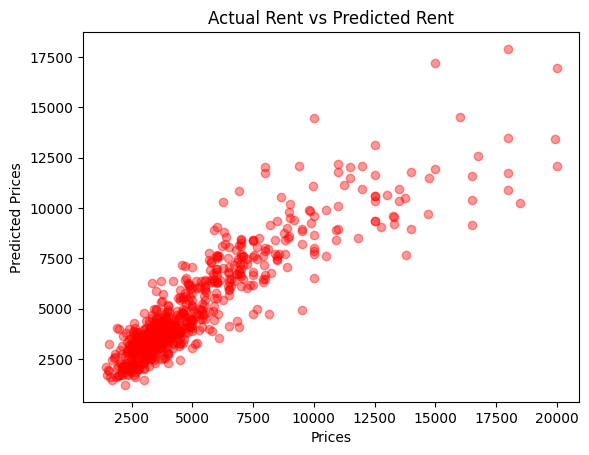

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


In [133]:
plt.scatter(y_test, y_predict, alpha=0.4, color="red")
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Rent vs Predicted Rent")
plt.show()
# Printing the coefficients
print(mlr.coef_)

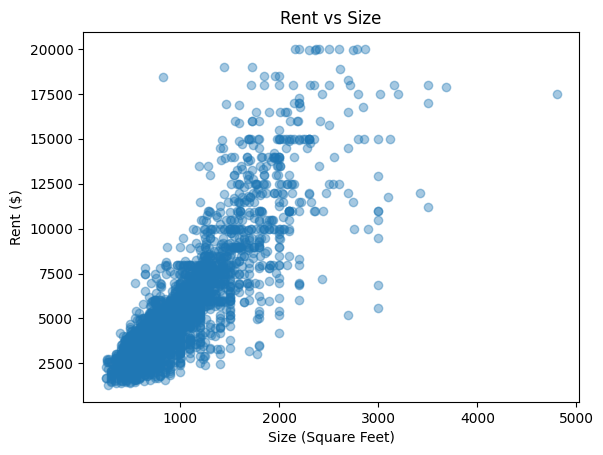

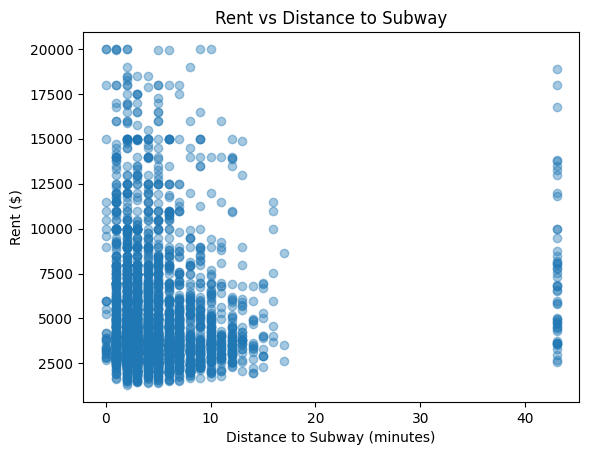

<Figure size 640x480 with 0 Axes>

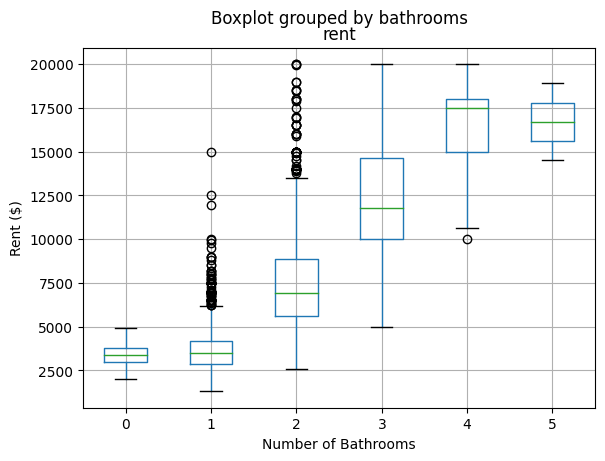

<Figure size 640x480 with 0 Axes>

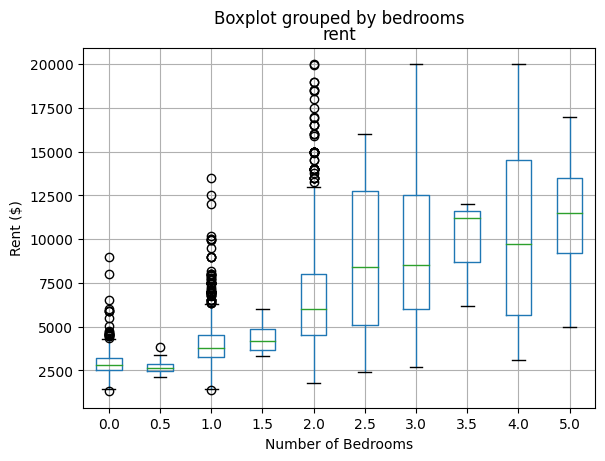

<Figure size 640x480 with 0 Axes>

In [134]:
plt.scatter(df[["size_sqft"]], df[["rent"]], alpha=0.4)
plt.xlabel("Size (Square Feet)")
plt.ylabel("Rent ($)")
plt.title("Rent vs Size")
plt.show()
plt.clf()

plt.scatter(df[["min_to_subway"]], df[["rent"]], alpha=0.4)
plt.xlabel("Distance to Subway (minutes)")
plt.ylabel("Rent ($)")
plt.title("Rent vs Distance to Subway")
plt.show()
plt.clf()

df.boxplot(column="rent", by="bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Rent ($)")
plt.show()
plt.clf()

df.boxplot(column="rent", by="bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent ($)")
plt.show()
plt.clf()

Evaluating model accuracy using residual analysis: The difference between the actual value y, and the predicted value ŷ is the residual e

Also, coefficient of determination built into linear_model.LinearRegression() as .score() returns R**2. R**2 is the percentage variation in y explained by all the x variables together. Usually, a R**2 of 0.70 is considered good.


In [135]:
print(f"Coeff of Determination Training: {mlr.score(x_train, y_train)}")
print(f"Coeff of Determination Test: {mlr.score(x_test, y_test)}")

Coeff of Determination Training: 0.7725460559817883
Coeff of Determination Test: 0.8050371975357664


In [136]:
streeteasy_manhattan = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")
streeteasy_brooklyn = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv")
streeteasy_queens = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv")

datasets = {
    "Manhattan": streeteasy_manhattan.copy(),
    "Brooklyn": streeteasy_brooklyn.copy(),
    "Queens": streeteasy_queens.copy()
}

In [137]:
zoe_apartment = [[1, 1, 620, 16, 1, 98, 0, 0, 1, 0, 0, 0, 1, 0]]
predict = mlr.predict(zoe_apartment)
print("Predicted rent: $%.2f" % predict)

# Warning as using raw string as input

Predicted rent: $2592.38


/Users/jai/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
